In [3]:
import pandas as pd

# Load the uploaded CSV file to analyze its structure
file_path = 'black_hole_detection_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the structure of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Node_ID                     10000 non-null  object 
 1   Node_Type                   10000 non-null  object 
 2   Trust_Value                 10000 non-null  float64
 3   Detection_Confidence        10000 non-null  float64
 4   Energy                      10000 non-null  float64
 5   Packets_Forwarded           10000 non-null  int64  
 6   Packets_Dropped             10000 non-null  int64  
 7   RREQ_Forwarded              10000 non-null  int64  
 8   RREP_Forwarded              10000 non-null  int64  
 9   Forwarding_Ratio            10000 non-null  float64
 10  Control_Packet_Ratio        10000 non-null  float64
 11  Sequence_Number_Difference  10000 non-null  int64  
 12  Reply_Count                 10000 non-null  int64  
 13  Suspicious_Activities       1000

(  Node_ID             Node_Type  Trust_Value  Detection_Confidence  Energy  \
 0  Node_1                Normal         0.41                  0.29    0.91   
 1  Node_2            Suspicious         0.36                  0.16    0.64   
 2  Node_3                Normal         0.46                  0.84    0.31   
 3  Node_4                Normal         0.21                  0.77    0.92   
 4  Node_5  Confirmed Black Hole         0.10                  0.84    0.11   
 
    Packets_Forwarded  Packets_Dropped  RREQ_Forwarded  RREP_Forwarded  \
 0                396              487              14               5   
 1                168               14              13              34   
 2                351              281              20              19   
 3                437              348              18              14   
 4                  0              457              11              34   
 
    Forwarding_Ratio  Control_Packet_Ratio  Sequence_Number_Difference  \
 0  

In [7]:
data.shape

(10000, 15)

In [1]:
import pygame
import random
import math

# Initialize Pygame
pygame.init()

# Constants
WIDTH, HEIGHT = 1280, 960
SIDEBAR_WIDTH = 200
MAIN_WIDTH = WIDTH - SIDEBAR_WIDTH
NODE_COUNT = 50
NODE_RADIUS = 8
BACKGROUND_COLOR = (30, 30, 30)
TEXT_COLOR = (255, 255, 255)
PACKET_COLOR = (0, 255, 255)
FPS = 30

# Colors for different node types
COLORS = {
    "Normal": (0, 255, 0),
    "Suspicious": (255, 255, 0),
    "Confirmed Black Hole": (255, 0, 0),
}

# Node energy depletion rate
ENERGY_DEPLETION = 0.01
ENERGY_DEPLETION_MIN = 0.005
ENERGY_DEPLETION_MAX = 0.02

# Packet forwarding probability
PACKET_FORWARD_PROB = 0.01
PACKET_FORWARD_PROB_MIN = 0.001
PACKET_FORWARD_PROB_MAX = 0.1

# Initialize screen
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Black Hole Detection Simulation")
font = pygame.font.Font(None, 24)

def draw_sidebar():
    pygame.draw.rect(screen, (40, 40, 40), (MAIN_WIDTH, 0, SIDEBAR_WIDTH, HEIGHT))

def display_statistics():
    y = 10
    stats = [
        f"Total Nodes: {NODE_COUNT}",
        f"Normal Nodes: {sum(1 for node in nodes if node['type'] == 'Normal')}",
        f"Suspicious Nodes: {sum(1 for node in nodes if node['type'] == 'Suspicious')}",
        f"Confirmed Black Holes: {sum(1 for node in nodes if node['type'] == 'Confirmed Black Hole')}",
        f"Detected Black Holes: {sum(1 for node in nodes if node['detected'])}",
        f"Average Energy: {sum(node['energy'] for node in nodes)/NODE_COUNT:.2f}",
    ]
    for line in stats:
        text = font.render(line, True, TEXT_COLOR)
        screen.blit(text, (MAIN_WIDTH + 10, y))
        y += 20

def draw_legend():
    y = HEIGHT - 80
    for label, color in [("Normal", COLORS["Normal"]), ("Suspicious", COLORS["Suspicious"]), ("Confirmed Black Hole", COLORS["Confirmed Black Hole"])]:
        pygame.draw.circle(screen, color, (MAIN_WIDTH + 30, y), 8)
        text = font.render(label, True, TEXT_COLOR)
        screen.blit(text, (MAIN_WIDTH + 50, y - 4))
        y += 20

def draw_button(rect, label):
    pygame.draw.rect(screen, (100, 100, 100), rect)
    text = font.render(label, True, TEXT_COLOR)
    screen.blit(text, (rect.x + (rect.width - text.get_width()) / 2, rect.y + (rect.height - text.get_height()) / 2))

def draw_slider(rect, value, min_val, max_val):
    pygame.draw.rect(screen, (200, 200, 200), rect)
    handle_x = rect.x + int((value - min_val) / (max_val - min_val) * rect.width)
    pygame.draw.rect(screen, (255, 255, 255), (handle_x - 5, rect.y - 5, 10, rect.height + 10))

def draw_slider_value(rect, value, y_offset):
    text = font.render(f"{value:.3f}", True, TEXT_COLOR)
    screen.blit(text, (rect.x + rect.width + 10, rect.y + y_offset))

def draw_detailed_stats(node):
    y = 350
    details = [
        f"ID: {node['id']}",
        f"Type: {node['type']}",
        f"Energy: {node['energy']:.2f}",
        f"Trust Value: {node['trust_value']:.2f}",
        f"Detection Confidence: {node['detection_confidence']:.2f}",
    ]
    for line in details:
        text = font.render(line, True, TEXT_COLOR)
        screen.blit(text, (MAIN_WIDTH + 10, y))
        y += 20

# Generate nodes
def initialize_nodes():
    nodes = []
    for i in range(NODE_COUNT):
        x = random.randint(50, MAIN_WIDTH - 50)
        y = random.randint(50, HEIGHT - 50)
        node_type = random.choices(
            ["Normal", "Suspicious", "Confirmed Black Hole"], weights=[0.8, 0.15, 0.05]
        )[0]
        energy = round(random.uniform(0.5, 1.0), 2)
        nodes.append({
            "id": f"Node_{i + 1}",
            "x": x,
            "y": y,
            "type": node_type,
            "energy": energy,
            "trust_value": round(random.uniform(0.1, 1.0), 2),
            "detection_confidence": round(random.uniform(0.1, 1.0), 2),
            "detected": False,
        })
    return nodes

nodes = initialize_nodes()
packets = []

# Buttons
button_start = pygame.Rect(MAIN_WIDTH + 10, 100, 180, 30)
button_pause = pygame.Rect(MAIN_WIDTH + 10, 140, 180, 30)
button_reset = pygame.Rect(MAIN_WIDTH + 10, 180, 180, 30)

# Sliders
slider_energy = pygame.Rect(MAIN_WIDTH + 10, 250, 180, 20)
slider_forward = pygame.Rect(MAIN_WIDTH + 10, 300, 180, 20)
slider_value_energy = ENERGY_DEPLETION
slider_value_forward = PACKET_FORWARD_PROB

# Flags
is_paused = False
dragging_slider = None
selected_node = None

# Main loop
running = True
clock = pygame.time.Clock()

while running:
    screen.fill(BACKGROUND_COLOR)
    draw_sidebar()
    
    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            mouse_x, mouse_y = event.pos
            if mouse_x < MAIN_WIDTH:
                for node in nodes:
                    if math.hypot(node["x"] - mouse_x, node["y"] - mouse_y) <= NODE_RADIUS:
                        selected_node = node
                        break
            else:
                selected_node = None
            if button_start.collidepoint(event.pos):
                is_paused = False
            if button_pause.collidepoint(event.pos):
                is_paused = not is_paused
            if button_reset.collidepoint(event.pos):
                nodes = initialize_nodes()
                packets = []
            if slider_energy.collidepoint(event.pos):
                dragging_slider = "energy"
            if slider_forward.collidepoint(event.pos):
                dragging_slider = "forward"
        elif event.type == pygame.MOUSEBUTTONUP:
            dragging_slider = None
        elif event.type == pygame.MOUSEMOTION:
            if dragging_slider == "energy":
                rel_x = event.pos[0] - slider_energy.x
                rel_x = max(0, min(slider_energy.width, rel_x))
                slider_value_energy = ENERGY_DEPLETION_MIN + (rel_x / slider_energy.width) * (ENERGY_DEPLETION_MAX - ENERGY_DEPLETION_MIN)
                ENERGY_DEPLETION = slider_value_energy
            if dragging_slider == "forward":
                rel_x = event.pos[0] - slider_forward.x
                rel_x = max(0, min(slider_forward.width, rel_x))
                slider_value_forward = PACKET_FORWARD_PROB_MIN + (rel_x / slider_forward.width) * (PACKET_FORWARD_PROB_MAX - PACKET_FORWARD_PROB_MIN)
                PACKET_FORWARD_PROB = slider_value_forward


    
    # Simulation logic
    if not is_paused:
        # Node packet forwarding
        for node in nodes:
            if node["energy"] > 0.1 and random.random() < PACKET_FORWARD_PROB:
                target = random.choice(nodes)
                if target != node and target["energy"] > 0.1:
                    packets.append({"source": node, "target": target, "progress": 0})
                    node["energy"] -= ENERGY_DEPLETION
    
    # Draw nodes
    for node in nodes:
        color = COLORS[node["type"]] if not node["detected"] else (255, 0, 255)
        pygame.draw.circle(screen, color, (node["x"], node["y"]), NODE_RADIUS)
    
    # Animate packets
    for packet in packets[:]:
        source, target = packet["source"], packet["target"]
        sx, sy = source["x"], source["y"]
        tx, ty = target["x"], target["y"]
        progress = packet["progress"]
        x = sx + (tx - sx) * progress
        y = sy + (ty - sy) * progress
        pygame.draw.circle(screen, PACKET_COLOR, (int(x), int(y)), 4)
        packet["progress"] += 0.05
        if packet["progress"] >= 1:
            packets.remove(packet)
            target["energy"] -= ENERGY_DEPLETION
    
    # Draw sidebar contents
    display_statistics()
    draw_legend()
    draw_button(button_start, "Start")
    draw_button(button_pause, "Pause")
    draw_button(button_reset, "Reset")
    draw_slider(slider_energy, slider_value_energy, ENERGY_DEPLETION_MIN, ENERGY_DEPLETION_MAX)
    draw_slider(slider_forward, slider_value_forward, PACKET_FORWARD_PROB_MIN, PACKET_FORWARD_PROB_MAX)
    draw_slider_value(slider_energy, slider_value_energy, 10)
    draw_slider_value(slider_forward, slider_value_forward, 10)
    
    # Draw selected node details
    if selected_node:
        draw_detailed_stats(selected_node)
    
    # Update screen
    pygame.display.flip()
    clock.tick(FPS)

# Quit Pygame
pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


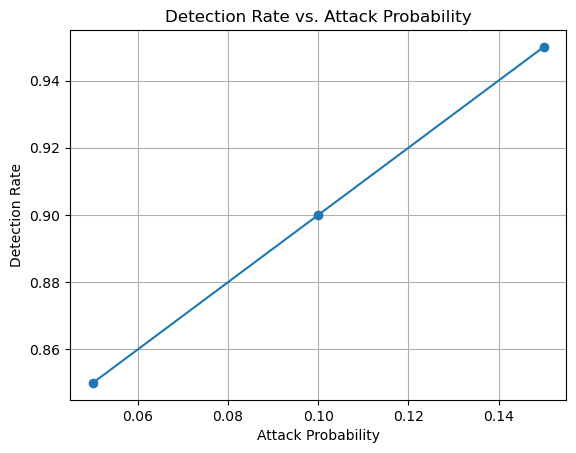

In [1]:
import matplotlib.pyplot as plt

# Example data (to be collected during simulation)
detection_rates = [0.85, 0.90, 0.95]  # Example detection rates
attack_probabilities = [0.05, 0.10, 0.15]  # Corresponding attack probabilities

# Plotting
plt.plot(attack_probabilities, detection_rates, marker='o')
plt.title('Detection Rate vs. Attack Probability')
plt.xlabel('Attack Probability')
plt.ylabel('Detection Rate')
plt.grid(True)
plt.show()